# Méthode de Newton

## Idée de la méthode


$f$ est une fonction définie sur un intervalle $I$ dans lequel elle possède un zéro $x^*$ : $f(x^*)=0$.  
On cherche à approcher ce zéro.

Soit $x_{app}$ est une valeur approchée de $x^*$. La tangente à $f$ en $x_{app}$ est une approximation à l'ordre 1 de $f$ lorsqu'on est proche de $x_{app}$ :
$$f(x)\simeq f(x_{app})+f'(x_{app})(x-x_{app})$$
On cherche un zéro de la fonction approximation : $$f(x_{app})+f'(x_{app})(x-x_{app})=0\iff x=x_{app}-\frac{f(x_{app})}{f'(x_{app})}$$
Comme on va le voir ci-après, ce zéro a de bonnes chances d'être plus proche de $x^*$ que $x_{app}$. 


## Hypothèses et construction de la méthode


Soient $a<b$ deux réels et soit $f:[a,b]\longrightarrow \mathbb{R}$ une fonction dont
on cherche un zéro $x^*\in]a,b[$ : $f(x^*)=0$.
On suppose que:

+ $f$ est dérivable sur $[a,b]$,
+ $f'$ ne s'annule pas sur $[a,b]$,
+ pour tout $x\in[a,b]$,
$x-\frac{f(x)}{f'(x)}\in[a,b].$


Sous ces hypothèses, on définit la fonction

$$g:\begin{cases} [a,b]\to [a,b]\\x\mapsto x-\dfrac{f(x)}{f'(x)}.\end{cases}$$

 
 
On fixe un élément $x_0\in[a,b]$ et on définit la suite $(x_n)_{n\in\mathbb{N}}$ par
$$ \forall n\in\mathbb{N},\quad x_{n+1}=g(x_n)=x_n-\frac{f(x_n)}{f'(x_n)}.$$

 
Sous certaines hypothèses la suite $(x_n)$ converge et on peut vérifier qu'elle converge vers un des zéros de $f$ :
$$\lim_{n \to +\infty} x_{n} = x^{*}.$$



## Implémentation de l'algorithme de Newton  

La fonction `newton` prend en arguments une fonction $f$, sa dérivée $f'$, une valeur initiale $x_0$, une tolérance $\epsilon>0$ pour le critère d’arrêt et un nombre d'itération maximal $N_{max}$.
Elle donne en sortie le nombre d'itérations nécessaires pour vérifier le critère d'arrêt, la solution approchée $x^*$ calculée avec la méthode de Newton et `xL` un `ndarray` contenant tous les termes de la suite $(x_n)$ construite par la méthode de Newton.


In [1]:
def newton(f, df, x0, epsilon, Nmax):
    """
    Algorithme de Newton pour résoudre f(x) = 0 
    
    Parameters
    ----------
    f: fonction f
    df:  fonction dérivé de f
    x0:  valeur initiale  
    epsilon: tolerance dans le critere d'arret
    Nmax:  nombre d'iterations maximal

    Returns
    -------
    niter: nombre d'iterations
    xstar: solution approchée
    xL: la liste des itérées de la méthode
    """

    x = x0
    fx, dfx = f(x), df(x)
    niter = 0
    xL = [x0]
    while abs(fx) >= epsilon and niter < Nmax and dfx != 0 :
        x -= fx / dfx
        fx, dfx = f(x), df(x)
        niter += 1
        xL.append(x)
    if dfx == 0:
        print('attention la valeur de la derivée de f (dfx) en ',x, ' est ', dfx)
        
    return niter, x, np.asanyarray(xL)

# Application de la méthode de Newton 

## Calcul de valeurs approchées de racines carrées

Nous allons utiliser la méthode de Newton pour calculer des valeurs approchées de racines carées. On considère :

\begin{equation}
f_0(x) = x^2-2~ \text{ pour } ~ x\ge 1 .
\end{equation}
L'équation $f_0(x)= 0$ admet dans l'intervalle une racine   $r_0=\sqrt2$.

En appliquant la méthode de Newton à $f_0$ on espère obtenir une approximation de $r_0$.

### Définition des fonctions

In [2]:
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

In [3]:
c = 2 #
#la fonction 
f0 = lambda x: x**2-c
#la racine 
r0= c**(1/2)
# la derivée
f0_derivative = lambda x: 2*x
#
f0_tangent = lambda x, xi: f0_derivative(xi)*(x-xi)+f0(xi)

In [4]:
#definir l'intervalle pour l'affichage 
a = 1/2 
b = 4

### Tracer la fonction, sa dérivée et la racine recherchée

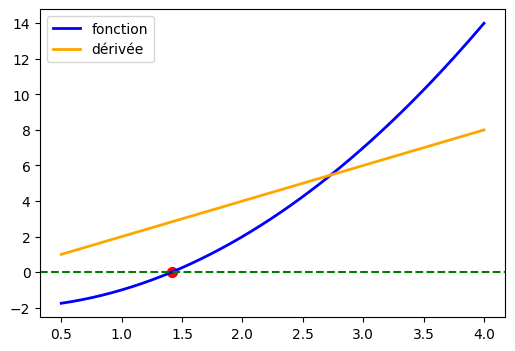

In [5]:
taille = 4
fig = plt.figure(figsize=(1.5*taille, taille))
#
ax = fig.add_subplot(1,1, 1)
ax.grid(False)
x = np.linspace(a, b, 128)
ax.plot(x, f0(x), linewidth=2,color='blue', label="fonction")
ax.plot(x, f0_derivative(x), linewidth=2, color='orange', label="dérivée")
ax.scatter([c**(1/2)], [0], color='red', s=50)
ax.axhline(0, color="green", linestyle='dashed')
ax.legend()

### Calcul de la racine carrée par la méthode de Newton

In [6]:
x0, epsilon, Nmax =4, 1.e-13, 10
niter, xstar, xL = newton(f0, f0_derivative, x0, epsilon, Nmax)

In [7]:
print(f'{r0= :.14f}')
print("Valeur initiale =", x0)
print("Nombre d'iterations =", niter)
#la liste des itérées de la méthode avec une précision de 15 décimales
formatted_xL = [f"{num:.14f}" for num in xL]
print("Liste des itérées ="," ".join(formatted_xL))

r0= 1.41421356237310
Valeur initiale = 4
Nombre d'iterations = 6
Liste des itérées = 4.00000000000000 2.25000000000000 1.56944444444444 1.42189036381514 1.41423428594007 1.41421356252493 1.41421356237310


### Illustration des premiers itérées

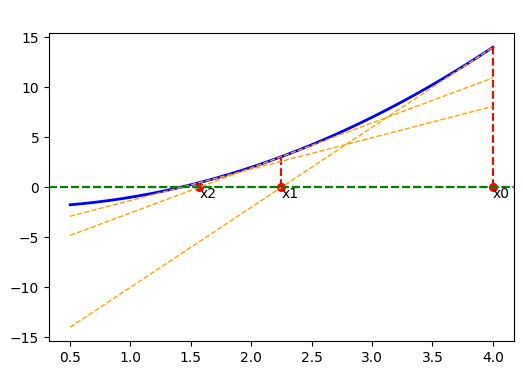

In [8]:
nit_show = 2

fig = plt.figure(figsize=(1.5*taille, taille))
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(a, b, 128)
ax.plot(x, f0(x), linewidth=2,color='blue', label=r'f(x)=$x^2-2$')
ax.grid(False)


    
k = 0
while k < len(xL) and k <= nit_show:
    x_app = xL[k]
    ax.plot(x, f0_tangent(x, x_app), linewidth=1, linestyle='dashed', color="orange")
    ax.scatter([x_app], [0], color='red', s=30)
    plt.text(x_app, -1.1, "x" + str(k))
    plt.vlines(x=x_app, ymin=0, ymax=f0(x_app), color='red', linestyle='dashed')
    ax.axhline(0, color='green', linestyle='dashed')
    # ax.legend()
    ax.set_title(" ", fontsize=14)
    k += 1

###  Exercice : Chercher une valeur approchée de $\sqrt3$ 
Appliquer l'algorithme de Newton  pour trouver une valeur approchée de  $\sqrt3$ en utilisant la fonction :
\begin{equation}
f(x) = x^2-3 \text{ pour} ~ x\ge 1.
\end{equation}

In [33]:
#Solution 
#Il suffit de modifier la valeur de c par 3 (c = 3) pour definir la nouvelle fonction
c = 3
f1 = lambda x: x**2 - c
r1= c**(1/2)
f1_derivative = lambda x: 2*x
f1_tangent = lambda x, xi: f1_derivative(xi)*(x-xi)+f1(xi)
#definir l'intervalle pour l'affichage 
a = 0 
b = 3
taille = 4
x0, epsilon, Nmax =3, 1.e-16, 100
niter, xstar, xL = newton(f1, f1_derivative, x0, epsilon, Nmax)
print(f'{r1= :.16f}')
print("Valeur initiale =", x0)
print("Nombre d'iterations =", niter)
#la liste des itérées de la méthode avec une précision de 15 décimales
formatted_xL = [f"{num:.16f}" for num in xL]
print("Liste des itérées ="," ".join(formatted_xL))

r1= 1.7320508075688772
Valeur initiale = 3
Nombre d'iterations = 100
Liste des itérées = 3.0000000000000000 2.0000000000000000 1.7500000000000000 1.7321428571428572 1.7320508100147276 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772 1.7320508075688774 1.7320508075688772

##   Vitesse de convergence 
###  Exercice : Analyse théorique

On souhaite analyser la vitesse de convergence de la méthode de Newton dans un cas particulier.

    
Soit $f:x\mapsto x^2-c$  où $c$ est un réel tel que $c>1$.   
1. Décrire la méthode de Newton appliquée à cette fonction (expliciter la fonction $g$ et la relation de récurrence pour la suite $(x_k)_{k\in \mathbb{N}}$). On prendra $x_0 >\sqrt c$.  
2. Montrer que l'intervalle $[\sqrt c\,, + \infty[$ est stable par $g$.

3. En déduire que la suite $(x_k)$ est bien définie et que $\forall k \in \mathbb{N}$, $x_k\geq\sqrt c$.  

4. Montrer que $(x_k)$ est décroissante, puis en déduire qu'elle converge vers $\sqrt c$.  
5. Montrer que pour tout $k$ dans $\mathbb{N}$, $x_{k+1} - \sqrt{c} = \dfrac{(x_k-\sqrt c)^2}{2 x_k}$. 
6. On note $\varepsilon_k = |x_k - \sqrt c|$ l'erreur. Montrer que $\varepsilon_{k+1} \leq \dfrac1{2\sqrt c} \varepsilon_k^2$. 
7. Justifier la phrase suivante : "À chaque itération le nombre de décimales exactes double. "
8. Donner un majorant de $\varepsilon_k$ qui dépend seulement de $\varepsilon_0$, $\sqrt c$ et $k$. 



###  Étude numérique de la vitesse de convergence pour le calcul  de $\sqrt 2$

erreurs absolues : eL = 2.58578643762691 0.83578643762690 0.15523088207135 0.00767680144205 0.00002072356698 0.00000000015184 0.00000000000000
coefficients de la droite de regression :  [ 1.93107364 -1.59329955]
pente de la droite de regression :  1.931073635699342


Text(0, 0.5, '$\\log_{10}|x_{n}-r_0|$')

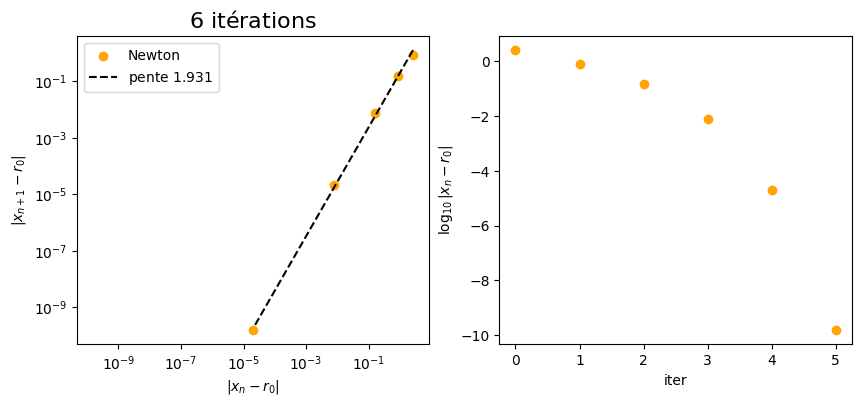

In [10]:
eL = abs(xL-r0) #erreur absolue 
formatted_eL = [f"{num:.14f}" for num in eL]
print("erreurs absolues : eL ="," ".join(formatted_eL))

fig = plt.figure(figsize=(2.5*taille, taille))
ax_eL = fig.add_subplot(1, 2, 1)
ax_eL.set_xscale('log')
ax_eL.set_yscale('log')
ax_eL.scatter(eL[:-1], eL[1:],color='orange', label='Newton')
eL= eL[eL>0] #avoid zero values for the fit
coeff = np.polyfit(np.log(eL[:-1]), np.log(eL[1:]), 1)
p = coeff[0]
print("coefficients de la droite de regression : ",coeff)
print("pente de la droite de regression : ", p)
ax_eL.plot( eL[:-1], np.exp(coeff[1])*(eL[:-1])**p,color='black', linestyle='dashed', label=f'pente ${p:5.3f}$')
ax_eL.legend()
niter=len(xL)-1
ax_eL.set_title(f"${niter}$ itérations", fontsize=16, color='black')
ax_eL.set_xlabel(r"$|x_{n}-r_0|$", color='black')
ax_eL.set_ylabel(r"$|x_{n+1}-r_0|$", color='black')


iter_array = np.arange(0, len(eL))
ax_eL2 = fig.add_subplot(1, 2, 2)
ax_eL2.scatter(iter_array , np.log10(eL),color='orange')
ax_eL2.set_xlabel(r"iter", color='black')
ax_eL2.set_ylabel(r"$\log_{10}|x_{n}-r_0|$", color='black')

**Questions**

- Interpréter le graphique de gauche, dans lequel on a représenté sur une échelle `log-log` la dépendence de l'erreur à l'itération $n+1$ en fonction de l'erreur à l'itération $n$. Quelle relation relie les logarithmes de ces erreurs, puis les erreurs elles-mêmes ?

- A l'aide du graphique de droite, déterminer le nombre d'itérations nécessaires pour obtenir une précision de $\varepsilon = 10^{-4}$, puis $\varepsilon = 10^{-8}$.

- Expliquer brièvement le sens pratique d'une convergence quadratique.  

### Exercice
Modifier le code pour analyser la vitesse de convergence de l'algorithme de Newton dans le cas de la fonction $f : x \to (x^2 - 2)^2$. 



In [11]:
#solution 


**Questions**

- Quel est le nombre d'itérations nécessaires pour obtenir une précision de $\varepsilon = 10^{-4}$ et $\varepsilon = 10^{-8}$ ? 
 
-  La convergence quadratique de la méthode de Newton est assurée par une certaine propriété que cette fonction ne vérifie plus. Quelle est cette propriété ? 

- La convergence est dans ce cas quadratique ? linéaire ? 


##  Bassins d'attraction
### Application dans $\mathbb{R}$
On s'intéresse maintenant au cas d'une fonction qui admet  $P$ zéros dans l'intervalle  $I$  : $x_1^*, x_2^*  \cdots x_{P}^{*}$.

En fonction du choix de la condition initiale $x_0$, l'algorithme va converger vers l'un ou l'autre de ces zéros. On appelle alors 
le bassin d'attraction $I_p$ d'un zéro $x^*_p$, l'ensemble des valeurs $x_0$ pour lesquelles $x_k \to x_p^{*}$. 

Voici un script qui détermine les bassins d'attraction dans le cas de la fonction  $h$ définie par  $h(x) = (x-1)(x-2)(x-3)$
pour tout $x \in [0.5,3.5]$.


In [12]:
h = lambda x: (x - 1) * (x - 2) * (x - 3)
#g(x)=3x**3-6*x**2+11*x-6
h_derivative = lambda x: 3 *x**2 - 12 * x + 11


N = 2 ** 8
x = np.linspace(0.5, 3.5, N)
xk = x.copy()
for k in range(20):
    xk = xk - h(xk) / h_derivative(xk)
    


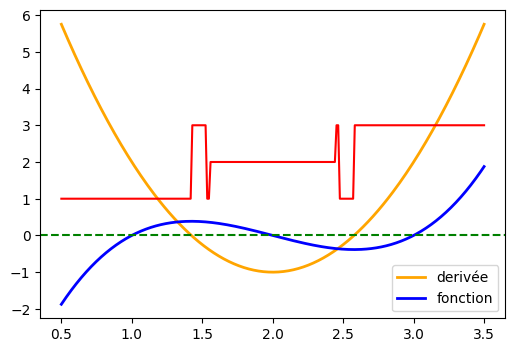

In [13]:
fig = plt.figure(figsize=(1.5*taille, taille))
axb = fig.add_subplot(1, 1, 1)
axb.plot(x, h_derivative(x), linewidth=2,color='orange', label="derivée")
axb.plot(x, h(x), linewidth=2,color='blue', label="fonction")
axb.plot(x, xk, 'r')
axb.axhline(0, color='green', linestyle='dashed');
axb.legend()

**Questions** 
- Expliquer brièvement le code.

- Exécuter ce code et en déduire les bassins d'attraction des zéros $x_1^{*} = 0$, $x_2^{*} = 1$ et  $x_3^{*} = 1$. Que remarquez-vous ?

- Interprétez le résultat en vous aidant par des dessins représentant les itérations de la méthode de Newton.



### Application dans le cas de polynômes dans $\mathbb{C}$ : les fractales 
On s'intéresse maintenant au cas d'un polynôme complexe $f(z) = z^p - 1$ et on souhaite 
déterminer les bassins d'attraction de la méthode de Newton associée. 

- Dans un premier temps, nous allons associer une couleur RGB à chaque  complexe $z \in \mathbb{C}$; $|z| \leq 1$. 
Exécuter le script suivant et en déduire la couleur associé à $z = 1$, $z = -1$,  $z = i$, et $z = -i$.   

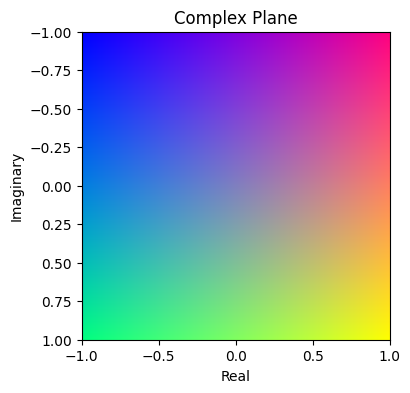

In [14]:
N = 2 ** 9
x = np.linspace(-1., 1., N)
X1, X2 = np.meshgrid(x, x) # two 512x512 matrices

Z = X1 + 1j * X2


Re_Z = np.real(Z)
Re_Z = np.minimum(np.maximum(Re_Z, -1), 1)#ensure they lie within the range [-1, 1],
Im_Z = np.imag(Z)
Im_Z = np.minimum(np.maximum(Im_Z, -1), 1)

#RGB image
Image = np.zeros((N, N, 3))
Image[:, :, 0] = (Re_Z + 1) / 2 #scaled and shifted real part of the complex numbers 
Image[:, :, 1] = (Im_Z + 1) / 2 # scaled and shifted imaginary part of the complex numbers 
Image[:, :, 2] = 1 - (Image[:, :, 0] ** 2 + Image[:, :, 1] ** 2) / 2 #inversely proportional to the magnitude of the complex number


fig = plt.figure(figsize=(taille, taille))
plt.imshow(Image, extent=[-1, 1, 1, -1])
#plt.set_cmap('jet')
#plt.colorbar()
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Plane')
plt.show()

In [15]:
#definition de la fonction et sa dérivée 
gc = lambda x, p: x**p - 1
gc_derivative = lambda x,p: p *x**(p-1)   

#### On s'intéresse d'abord au cas p=2
$f(z) = z^2 - 1$ 

In [16]:
p = 2

In [17]:
iterMax = 50
N = 2 ** 9

Zk = Z.copy()
for k in range(iterMax):
    Zk = Zk - gc(Zk,p) / gc_derivative(Zk,p)

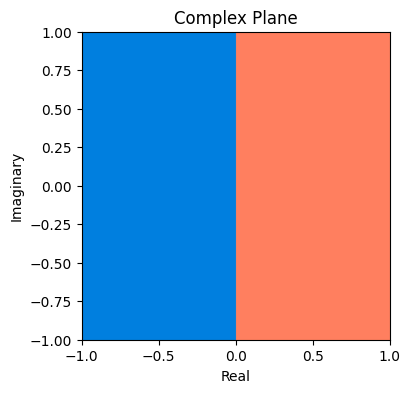

In [18]:
Re_Zk = np.real(Zk)
Re_Zk = np.minimum(np.maximum(Re_Zk, -1), 1)
Im_Zk = np.imag(Zk)
Im_Zk = np.minimum(np.maximum(Im_Zk, -1), 1)

Imagek = np.zeros((N, N, 3))
Imagek[:, :, 0] = (Re_Zk + 1) / 2
Imagek[:, :, 1] = (Im_Zk + 1) / 2
Imagek[:, :, 2] = 1 - (Imagek[:, :, 0] ** 2 + Imagek[:, :, 1] ** 2) / 2

fig2 = plt.figure(figsize=(taille, taille))
plt.imshow(Imagek, extent=[-1., 1., -1., 1.])
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Plane')
plt.show()

Les bassins d’attraction des deux racines de $z^2 – 1$, en "rouge" le bassin d'attraction de 1 et en "bleu" de -1

In [19]:
#Si l'on part d'un point sur Oy 
zk = 0+2*1j 
print(zk)
Niter = 10
for k in range(Niter):
    zk = zk - gc(zk,p) / gc_derivative(zk,p)
    print("iteration =", k+1,"  iteré = ",zk)

2j
iteration = 1   iteré =  0.75j
iteration = 2   iteré =  -0.29166666666666674j
iteration = 3   iteré =  1.5684523809523803j
iteration = 4   iteré =  0.4654406117285619j
iteration = 5   iteré =  -0.841530602630985j
iteration = 6   iteré =  0.1733901559391644j
iteration = 7   iteré =  -2.7969749740686076j
iteration = 8   iteré =  -1.2197229272382335j
iteration = 9   iteré =  -0.1999322995161441j
iteration = 10   iteré =  2.4008803928468465j


#### On s'intéresse maintenant au cas p=4
$f(z) = z^4 - 1$ 


In [20]:
p = 4

In [21]:
#definition de la suite 
iterMax = 50
N = 2 ** 9

Zk = Z.copy()
for k in range(iterMax):
    Zk = Zk - gc(Zk,p) / gc_derivative(Zk,p)

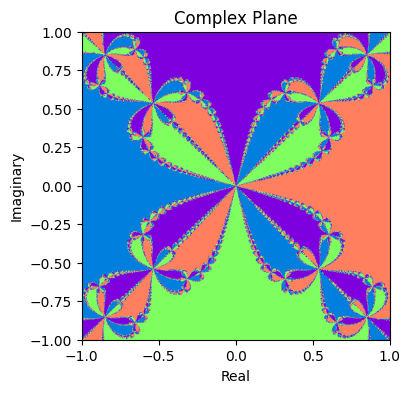

In [22]:
Re_Zk = np.real(Zk)
Re_Zk = np.minimum(np.maximum(Re_Zk, -1), 1)
Im_Zk = np.imag(Zk)
Im_Zk = np.minimum(np.maximum(Im_Zk, -1), 1)

Imagek = np.zeros((N, N, 3))
Imagek[:, :, 0] = (Re_Zk + 1) / 2
Imagek[:, :, 1] = (Im_Zk + 1) / 2
Imagek[:, :, 2] = 1 - (Imagek[:, :, 0] ** 2 + Imagek[:, :, 1] ** 2) / 2

fig2 = plt.figure(figsize=(taille, taille))
plt.imshow(Imagek, extent=[-1., 1., -1., 1.])
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Plane')
plt.show()

Combien de couleurs a-t-on dans cette image ? Pourquoi ? 